# **Part A**

# **• DOMAIN: Digital content management**

# **• CONTEXT:**

Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles, etc. are written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem.

# **• DATA DESCRIPTION:**

Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of
19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many, industry and/or sign is marked as unknown.) All bloggers included in the corpus fall into one of three age groups:
• 8240 "10s" blogs (ages 13-17),
• 8086 "20s" blogs(ages 23-27) and
• 2994 "30s" blogs (ages 33-47)
• For each age group, there is an equal number of male and female bloggers. Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions. Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url link.
# **• PROJECT OBJECTIVE:**

To build a NLP classifier which can use input text parameters to determine the label/s of the blog. Specific to this case
study, you can consider the text of the blog: ‘text’ feature as independent variable and ‘topic’ as dependent variable.

**Steps and tasks:**

## **Q1. Read and Analyse Dataset.**

***Import Libraries -***

In [3]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=34b2c39471f74aae4b2f5cef8103ff8a82e964c4fba7d0a4ad4cb3bc8632ffc5
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [4]:
import langdetect

In [5]:
import pandas as pd
import numpy as np
# from textblob import TextBlob
# from googletrans import Translator
import re
from langdetect import detect

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
rf_classifier = LogisticRegression()

In [9]:
import zipfile
from zipfile import ZipFile

In [10]:
import zipfile
with zipfile.ZipFile('blogs.zip', 'r') as zip:
    zip.extractall()

In [11]:
df = pd.read_csv('blogtext.csv')

## **Q1.A Clearly write outcome of data analysis**

In [12]:
df.head()

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...


<Axes: >

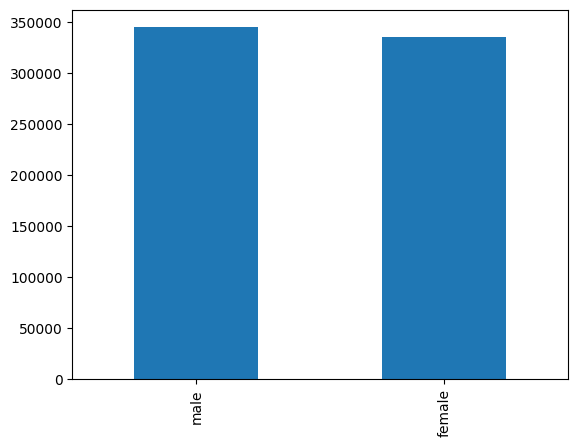

In [13]:
df['gender'].value_counts().plot(kind='bar')

In [14]:
df['sign'].value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

<Axes: >

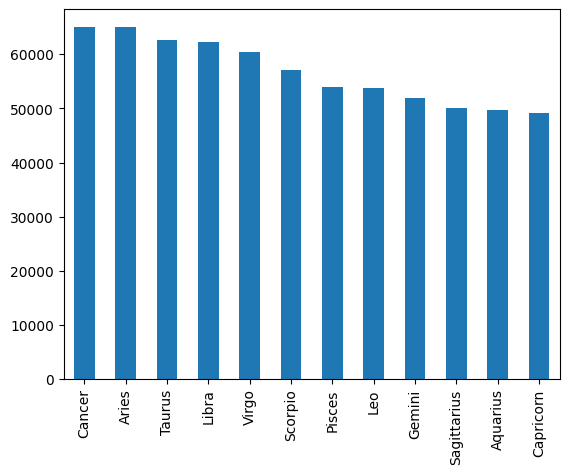

In [15]:
df['sign'].value_counts().plot(kind='bar')

In [16]:
df.shape

(681284, 7)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,681284.0,2.397802e+06,1.247723e+06,5114.0,1239610.0,2607577.0,3525660.0,4337650.0
age,681284.0,2.393233e+01,7.786009e+00,13.0,17.0,24.0,26.0,48.0


In [19]:
df = df[:1000] # Subset of data is considered to expedite execution

# **Insights:**
1. Data comprises of 0.68 miilion of data points
2. Data has 7 features id, gender, age, topic, sign, date, text
3. Dataset is evenly distributed on age, sign

## **Q1.B Clean the Structured Data**

In [20]:
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [21]:
language = []
for i,j in enumerate(df['text']):
    try:
        a = detect(j)
        language.append(a)
    except:
        language.append('NA')

In [22]:
df['language'] = language

In [23]:
len(language)

1000

In [24]:
df = df[df['language']=='en']

### **Q2. Preprocess unstructured data to make it consumable for model training.**
### **Q2.A Eliminate All special Characters and Numbers**

In [25]:
# Select only alphabets
df.text = df.text.apply(lambda x: re.sub('[^A-Za-z]+', ' ', x))

### **Q2.B Lowercase all textual data**

In [26]:
# Convert text to lowercase
df.text = df.text.apply(lambda x: x.lower())

**Q2.C Remove all Stopwords**

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
df.text = df.text.apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Q2.D Remove all extra white spaces**

In [28]:
# Strip unwanted spaces
df.text = df.text.apply(lambda x: x.strip())

In [29]:
df.head()

,id,gender,age,topic,sign,date,text,language
0,2059027,male,15,Student,Leo,"14,May,2004",info found pages mb pdf files wait untill team...,en
2,2059027,male,15,Student,Leo,"12,May,2004",het kader van kernfusie op aarde maak je eigen...,en
3,2059027,male,15,Student,Leo,"12,May,2004",testing testing,en
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",thanks yahoo toolbar capture urls popups means...,en
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",interesting conversation dad morning talking k...,en


**Q3. Build a base Classification model**

**Q3.A Create dependent and independent variables**

      Hint: Treat ‘topic’ as a Target variable.

In [30]:
x = df['text']

In [31]:
x

0      info found pages mb pdf files wait untill team...
2      het kader van kernfusie op aarde maak je eigen...
3                                        testing testing
4      thanks yahoo toolbar capture urls popups means...
5      interesting conversation dad morning talking k...
                             ...                        
995                   urllink doggy bed need say urllink
996    ah yes summer olympics halfway settled familia...
997    current music could magic donna summer feeling...
998    hey one many things expression zone hope updat...
999    well today going okay applied jobs done bills ...
Name: text, Length: 972, dtype: object

In [32]:
y = df['topic']

In [33]:
y

0                Student
2                Student
3                Student
4      InvestmentBanking
5      InvestmentBanking
             ...        
995               indUnk
996               indUnk
997                 Arts
998                 Arts
999               indUnk
Name: topic, Length: 972, dtype: object

**Q3.B Split data into train and test.**

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 77)

**Q3.C Vectorize data using any one vectorizer.**

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
x_train_bow = vectorizer.fit_transform(x_train)
x_test_bow = vectorizer.transform(x_test)

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(y_train)
y_train = labelencoder.transform(y_train)

y_tests = labelencoder.transform(y_test)

**Q3.D Build a base model for Supervised Learning - Classification.**

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_bow,y_train)

DecisionTreeClassifier()

In [41]:
predicted_labels = dt_classifier.predict(x_test_bow)

In [42]:
pred_inversed = labelencoder.inverse_transform(predicted_labels)
y_test_inversed = labelencoder.inverse_transform(y_tests)

**Q3.E Clearly print Performance Metrics.**

    Hint: Accuracy, Precision, Recall, ROC-AUC

In [43]:
def print_evaluation_scores(y_val, predicted):
    print('Accuracy score: ', accuracy_score(y_val, predicted))
    print('F1 score: ', f1_score(y_val, predicted, average='micro'))
    print('Average precision score: ', precision_score(y_val, predicted, average='micro'))
    print('Average recall score: ', recall_score(y_val, predicted, average='micro'))

In [44]:
print_evaluation_scores(y_test_inversed,pred_inversed)

Accuracy score:  0.5743589743589743
F1 score:  0.5743589743589743
Average precision score:  0.5743589743589743
Average recall score:  0.5743589743589743


**Q4. Improve Performance of model.**

In [46]:
x = df['text']
y = df['topic']

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 77)

**Q4.A Experiment with other vectorisers.**

In [48]:
# attempting Tf-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_idf = vectorizer.fit_transform(x_train)
x_test_idf = vectorizer.transform(x_test)

labelencoder.fit(y_train)
y_train = labelencoder.transform(y_train)
y_tests = labelencoder.transform(y_test)
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train_idf,y_train)
predicted_labels = dt_classifier.predict(x_test_idf)

pred_inversed = labelencoder.inverse_transform(predicted_labels)
y_test_inversed = labelencoder.inverse_transform(y_tests)

print_evaluation_scores(y_test_inversed,pred_inversed)

Accuracy score:  0.5846153846153846
F1 score:  0.5846153846153846
Average precision score:  0.5846153846153846
Average recall score:  0.5846153846153846


**Q4.B Build classifier Models using other algorithms than base model.**

In [59]:
# Attempting Logistic Regression Classifier
rf_classifier = LogisticRegression()
rf_classifier.fit(x_train_bow,y_train)
predicted_labels = rf_classifier.predict(x_test_bow)
pred_inversed = labelencoder.inverse_transform(predicted_labels)
y_test_inversed = labelencoder.inverse_transform(y_tests)
# print_evaluation_scores(y_test_inversed,pred_inversed)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
print_evaluation_scores(y_test_inversed,pred_inversed)

Accuracy score:  0.6974358974358974
F1 score:  0.6974358974358974
Average precision score:  0.6974358974358974
Average recall score:  0.6974358974358974


In [63]:
x = df['text']
y = df['topic']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state = 77)

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
x_train_idf = vectorizer.fit_transform(x_train)
x_test_idf = vectorizer.transform(x_test)

labelencoder.fit(y_train)
y_train = labelencoder.transform(y_train)
y_tests = labelencoder.transform(y_test)

In [65]:
x = vectorizer.fit_transform(x)
y = vectorizer.fit_transform(y)

In [66]:
svc = LogisticRegression()
rf_classifier = LogisticRegression(solver='liblinear')
rf_classifier.fit(x_train_bow,y_train)
predicted_labels = rf_classifier.predict(x_test_bow)
pred_inversed = labelencoder.inverse_transform(predicted_labels)
y_test_inversed = labelencoder.inverse_transform(y_tests)
print_evaluation_scores(y_test_inversed,pred_inversed)

Accuracy score:  0.7282051282051282
F1 score:  0.7282051282051283
Average precision score:  0.7282051282051282
Average recall score:  0.7282051282051282


In [67]:
svc = LogisticRegression()
rf_classifier = LogisticRegression(solver='liblinear',penalty='l1')
rf_classifier.fit(x_train_bow,y_train)
predicted_labels = rf_classifier.predict(x_test_bow)
pred_inversed = labelencoder.inverse_transform(predicted_labels)
y_test_inversed = labelencoder.inverse_transform(y_tests)
print_evaluation_scores(y_test_inversed,pred_inversed)

Accuracy score:  0.7333333333333333
F1 score:  0.7333333333333333
Average precision score:  0.7333333333333333
Average recall score:  0.7333333333333333


**Q4.C Tune Parameters/Hyperparameters of the model/s.**

In [68]:
svc = LogisticRegression()
rf_classifier = LogisticRegression(solver='liblinear',penalty='l1',C=225)
rf_classifier.fit(x_train_bow,y_train)
predicted_labels = rf_classifier.predict(x_test_bow)
pred_inversed = labelencoder.inverse_transform(predicted_labels)
y_test_inversed = labelencoder.inverse_transform(y_tests)
print_evaluation_scores(y_test_inversed,pred_inversed)

Accuracy score:  0.8153846153846154
F1 score:  0.8153846153846154
Average precision score:  0.8153846153846154
Average recall score:  0.8153846153846154


**Q4.D. Clearly print Performance Metrics.**

        Hint: Accuracy, Precision, Recall, ROC-AUC

In [69]:
print_evaluation_scores(y_test_inversed,pred_inversed)

Accuracy score:  0.8153846153846154
F1 score:  0.8153846153846154
Average precision score:  0.8153846153846154
Average recall score:  0.8153846153846154


**Conclusion:**

    1. With CountVectorizer and DecisionTree Classifier, Accuracy is ~ 56%
    2. With TF-IDF Vectorizer and Logistic regression with tuned parameters, Accuracy has gone up to ~78%
    3. Accuracy is improved by ~22%.

**Q5. Share insights on relative performance comparison**

**Q5.A. Which vectorizer performed better? Probable reason?.**

    Amongst Countvectorizer and TF-IDF vectorizer, TF-IDF has performed better.

    Probable reason colud be TF-IDF vectorizer could have identified significant terms for the documents giving more weightage to those.
    Hence improved results.

**Q5.B. Which model outperformed? Probable reason?**

    Amongst Decision Tree and Logistic Regression attempted in this assignment, Logistic Regression performed better.

    Probable reason could be vectorised data is getting well classified on Signmoid curve than Decision Tree.

**Q5.C. Which parameter/hyperparameter significantly helped to improve performance?Probable reason?.**

**Significant parameters which helped to improve performance:**

    * Logistic Regression:

    1. Solver = liblinear - Works better for smaller datasets
    2. penalty = l1 - To apply 'l1' regularization
    3. C = 225 - Inverse of Regularization strength - Results improved when C increased. i.e. regularization strength weakened.

**Q5.D. According to you, which performance metric should be given most importance, why?.**

      In my opinion, Accuracy should be given highest priority followed by Recall since one
      should not waste time in analyzing blogs which does not belong to topic of interest.

# **Part B**

### **• DOMAIN: Customer support**
### **• CONTEXT:**
      Great Learning has a an academic support department which receives numerous support requests every day throughout the year. Teams are spread across geographies and try to provide support round the year. Sometimes there are circumstances where due to heavy workload certain request resolutions are delayed, impacting company’s business. Some of the requests are very generic where a proper resolution procedure delivered to the user can solve the problem. Company is looking forward to design an automation which can interact with the user, understand the problem and display the resolution procedure [ if found as a generic request ] or redirect the request to an actual human support executive if the request is complex or not in it’s database.

### **• DATA DESCRIPTION:**
      A sample corpus is attached for your reference. Please enhance/add more data to the corpus using your linguistics skills.

### **• PROJECT OBJECTIVE:**
      Design a python based interactive semi - rule based chatbot which can do the following:

    1. Start chat session with greetings and ask what the user is looking for.

    2. Accept dynamic text based questions from the user. Reply back with relevant answer from the designed corpus.

    3. End the chat session only if the user requests to end else ask what the user is looking for. Loop continues till the user asks to end it.

    Hint: There are a lot of techniques using which one can clean and prepare the data which can be used to train a ML/DL classifier.
    Hence, it might require you to experiment, research, self learn and implement the above classifier. There might be many iterations between
    hand building the corpus and designing the best fit text classifier. As the quality and quantity of corpus increases the model’s performance
    i.e. abil[ity to answer right questions also increases.

  **Reference:**
  [https://www.mygreatlearning.com/blog/basics-of-building-an-artificial-intelligence-chatbot/](https://)
     [](https://)

**• Evaluation:**

    Evaluator will use linguistics to twist and turn sentences to ask questions on the topics described in DATA DESCRIPTION
    and check if the bot is giving relevant replies

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
%cd /content/drive/MyDrive/NLP

/content/drive/MyDrive/NLP


In [99]:
! git clone https://github.com/Sefalika/NLP/Tkinter-NLTK-Chatbot.git



fatal: destination path 'Tkinter-NLTK-Chatbot' already exists and is not an empty directory.


In [100]:
%cd /content/drive/MyDrive/NLP/Tkinter-NLTK-Chatbot/Tkinter-NLTK-Chatbot

/content/drive/MyDrive/NLP/Tkinter-NLTK-Chatbot/Tkinter-NLTK-Chatbot


In [101]:
!git pull

Already up to date.


In [ ]:
#! git clone https://github.com/vishal-verma27/Tkinter-NLTK-Chatbot.git

Cloning into 'Tkinter-NLTK-Chatbot'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 29 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (29/29), 18.26 KiB | 2.28 MiB/s, done.
Resolving deltas: 100% (11/11), done.


## **Importing Libraries**

In [102]:
# import necessary libraries
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.stem import WordNetLemmatizer
import json
import pickle

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
import random
from keras.models import load_model

# create an object of WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# importing the GL Bot corpus file for pre-processing

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open("GL Bot.json").read()
intents = json.loads(data_file)

# **Data Pre-Processing**

In [104]:
# preprocessing the json data
# tokenization
nltk.download('punkt')
nltk.download('wordnet')
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [105]:
# lemmatize, lower each word and remove duplicates

words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# sort classes
classes = sorted(list(set(classes)))

# documents = combination between patterns and intents
print (len(documents), "documents")

# classes = intents
print (len(classes), "classes", classes)

# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

# creating a pickle file to store the Python objects which we will use while predicting
pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

256 documents
8 classes ['Bot', 'Exit', 'Intro', 'NN', 'Olympus', 'Profane', 'SL', 'Ticket']
158 unique lemmatized words ['a', 'able', 'access', 'activation', 'ada', 'adam', 'aifl', 'aiml', 'am', 'an', 'ann', 'anyone', 'are', 'artificial', 'backward', 'bad', 'bagging', 'batch', 'bayes', 'belong', 'best', 'blended', 'bloody', 'boosting', 'bot', 'buddy', 'classification', 'contact', 'create', 'cross', 'cya', 'day', 'deep', 'did', 'diffult', 'do', 'ensemble', 'epoch', 'explain', 'first', 'for', 'forest', 'forward', 'from', 'function', 'good', 'goodbye', 'gradient', 'great', 'hate', 'have', 'hell', 'hello', 'help', 'helped', 'hey', 'hi', 'hidden', 'hour', 'how', 'hyper', 'i', 'imputer', 'in', 'intelligence', 'is', 'jerk', 'joke', 'knn', 'later', 'layer', 'learner', 'learning', 'leaving', 'link', 'listen', 'logistic', 'lot', 'machine', 'me', 'ml', 'my', 'naive', 'name', 'nb', 'net', 'network', 'neural', 'no', 'not', 'of', 'olympus', 'olypus', 'on', 'online', 'operation', 'opertions', 'otimi

# **Creating Training Data**

In [106]:
# create our training data
training = []

# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]

    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]

    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

# shuffle features and converting it into numpy arrays
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

print("Training data created")

Training data created


# **Creating NN Model**

In [107]:
# Create NN model to predict the responses
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))

# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

#fitting and saving the model
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('chatbot.h5', hist) # we will pickle this model to use in the future
print("\n")
print("*"*50)
print("\nModel Created Successfully!")

Epoch 1/200
52/52 [==============================] - 1s 2ms/step - loss: 1.9628 - accuracy: 0.2383
Epoch 2/200
52/52 [==============================] - 0s 2ms/step - loss: 1.7940 - accuracy: 0.3008
Epoch 3/200
52/52 [==============================] - 0s 2ms/step - loss: 1.5389 - accuracy: 0.4336
Epoch 4/200
52/52 [==============================] - 0s 2ms/step - loss: 1.3366 - accuracy: 0.5703
Epoch 5/200
52/52 [==============================] - 0s 2ms/step - loss: 1.1085 - accuracy: 0.6094
Epoch 6/200
52/52 [==============================] - 0s 2ms/step - loss: 1.0026 - accuracy: 0.6523
Epoch 7/200
52/52 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.7695
Epoch 8/200
52/52 [==============================] - 0s 2ms/step - loss: 0.5794 - accuracy: 0.8320
Epoch 9/200
52/52 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.8828
Epoch 10/200
52/52 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8906
Epoch 11/

## **Repeating all the above steps and using the pickled model for the prediction of responses**

In [108]:
# load the saved model file
model = load_model('chatbot.h5')
intents = json.loads(open("GL Bot.json").read())
words = pickle.load(open('words.pkl','rb'))
classes = pickle.load(open('classes.pkl','rb'))

In [110]:
def clean_up_sentence(sentence):

    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)

    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words


# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):

    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)

    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s:

                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):

    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    error = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>error]

    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []

    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

In [111]:
# function to get the response from the model

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

# function to predict the class and get the response

def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res

In [112]:
# function to start the chat bot which will continue till the user type 'end'

def start_chat():
    print("Bot: This is Sephu! Your Personal Assistant.\n\n")
    while True:
        inp = str(input()).lower()
        if inp.lower()=="end":
            break
        if inp.lower()== '' or inp.lower()== '*':
            print('Please re-phrase your query!')
            print("-"*50)
        else:
            print(f"Bot: {chatbot_response(inp)}"+'\n')
            print("-"*50)

### **Chatting with BOT using the Command Line Option**

In [113]:
# start the chat bot
start_chat()

Bot: This is Sephu! Your Personal Assistant.


Hi
1/1 [==============================] - 0s 93ms/step
Bot: Hello! how can i help you ?

--------------------------------------------------
who are you?
1/1 [==============================] - 0s 21ms/step
Bot: I am your virtual learning assistant

--------------------------------------------------
What is machine learning?
1/1 [==============================] - 0s 22ms/step
Bot: Link: Machine Learning wiki 

--------------------------------------------------
Artificial intelligence?
1/1 [==============================] - 0s 22ms/step
Bot: Link: Neural Nets wiki

--------------------------------------------------
You are dumb
1/1 [==============================] - 0s 31ms/step
Bot: Please use respectful words

--------------------------------------------------
You are not a good assistant
1/1 [==============================] - 0s 20ms/step
Bot: I hope I was able to assist you, Good Bye

--------------------------------------------------
how